In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# additional packages needed
import time

# to run on IBM computer
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy
from qiskit.tools import backend_monitor

# import matplot lib
import matplotlib as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# The 5 position state qubits
The circuits below give the coin and shift operators for the QRW. This can be done purely with CNOT and Toffoli  gates. This is the circuit that was shown in the paper. This circuit was done purely on the simulator since it had two many qubits to run on the IBM hardware.

## The circuit
This is based on Figure 4 from the paper.

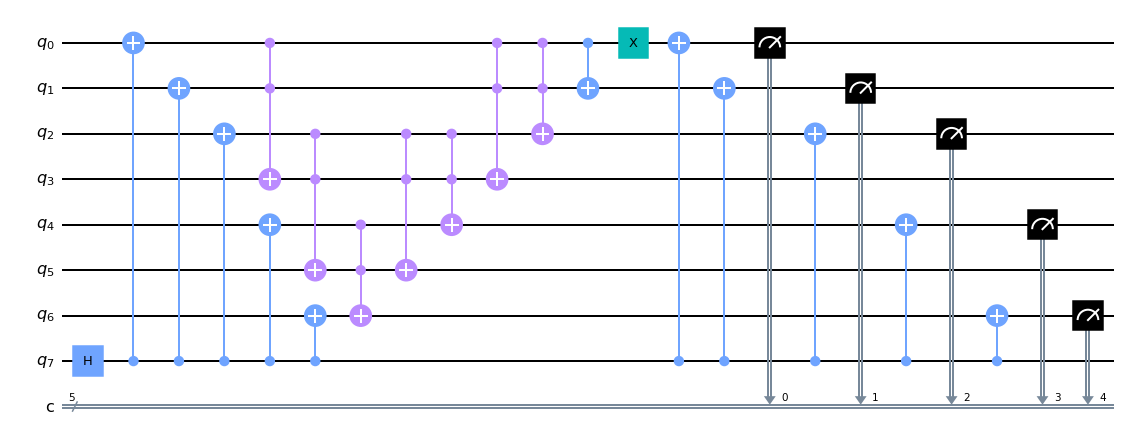

In [4]:
## Coin and shift operator for walking on the number line with five-position states (Figure 4)

qc = QuantumCircuit(8, 5)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c0 = 3
q3 = 4
c1 = 5
q4 = 6
c = 7

# set the initial states |00000>

# the start of a step
def circ5(steps):
    for i in range(steps):
        qc.h(c)
        qc.cx(c, q0)
        qc.cx(c, q1)
        qc.cx(c, q2)
        qc.cx(c, q3)
        qc.cx(c, q4)

        # this part can be replaced by the MCT gate
        qc.ccx(q0, q1, c0)
        qc.ccx(q2, c0, c1)
        qc.ccx(q3, c1, q4)
        qc.ccx(q2, c0, c1)
        qc.ccx(q2, c0, q3)
        # end of the part that can be replaced by the MCT gate

        qc.ccx(q0, q1, c0)
        qc.ccx(q0, q1, q2)
        qc.cx(q0, q1)
        qc.x(q0)
        qc.cx(c, q0)
        qc.cx(c, q1)
        qc.cx(c, q2)
        qc.cx(c, q3)
        qc.cx(c, q4)
        # end of step

    qc.measure([q0, q1, q2, q3, q4], [0, 1, 2, 3, 4])

circ5(1)
qc.draw()

## Initial Condition |00000>

In [6]:
# try 1 step to examine behaviors
qc = QuantumCircuit(8, 5)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c0 = 3
q3 = 4
c1 = 5
q4 = 6
c = 7

# set the initial states |00000>

step5(1)

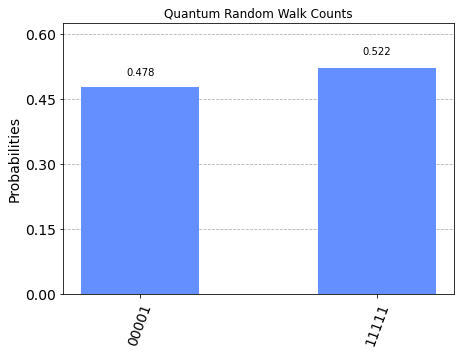

In [7]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

This is the same output for 1 step that we've seen for the other circuits

In [8]:
qc = QuantumCircuit(8, 5)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c0 = 3
q3 = 4
c1 = 5
q4 = 6
c = 7

# set the initial states |00000>

step5(2)

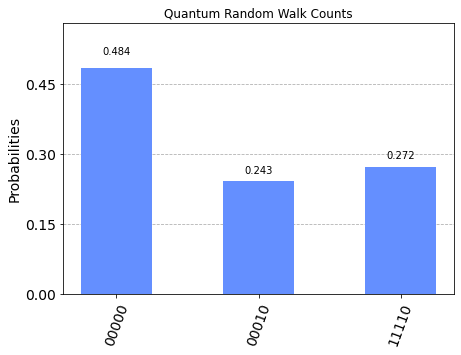

In [9]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

We get the same probability distribution as for the 2 steps of the 3 position.

In [12]:
qc = QuantumCircuit(8, 5)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c0 = 3
q3 = 4
c1 = 5
q4 = 6
c = 7

# set the initial states |00000>

step5(3)

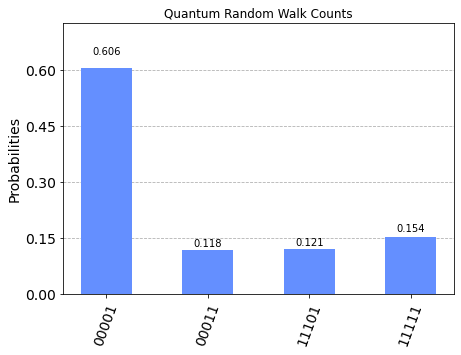

In [13]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

This again exhibits the same probability distribution as the 3 position qubit circuit.

In [14]:
qc = QuantumCircuit(8, 5)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c0 = 3
q3 = 4
c1 = 5
q4 = 6
c = 7

# set the initial states |00000>

step5(4)

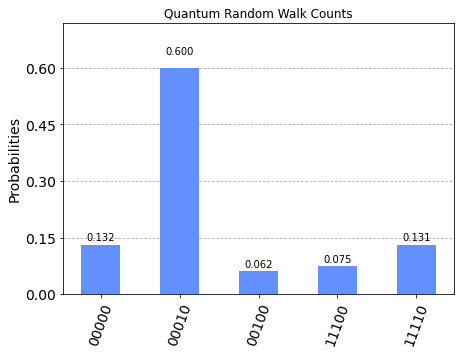

In [15]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

We start to get differing results from the 3 position circuit are there are more allowed states. 

In [24]:
# now jump to 10 steps
qc = QuantumCircuit(8, 5)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c0 = 3
q3 = 4
c1 = 5
q4 = 6
c = 7

# set the initial states |00000>

step5(10)

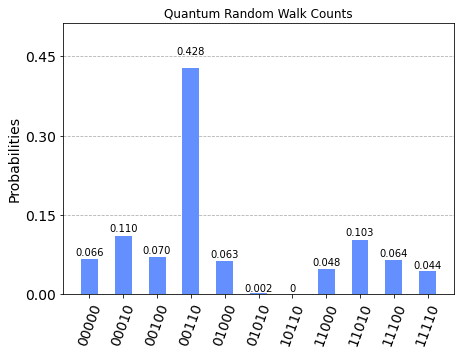

In [25]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

The high probability spike is at |00110> which breaks the pattern of only 1 step is the backwards direction There still seems to be a probability bias towards the "right."

In [27]:
# now jump to 13 steps
qc = QuantumCircuit(8, 5)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c0 = 3
q3 = 4
c1 = 5
q4 = 6
c = 7

# set the initial states |00000>

step5(13)

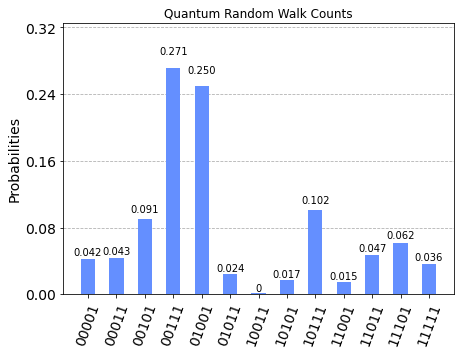

In [28]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

We get about equal probability spikes at |00111> and |01001> which still indicates a bias towards the right.

## Different Initial Conditions
We can try different initial conditions. This will also allow us to map out which position states are next to each other on the number line as 1 step of the circuit will give the states to the "right" and "left" of the inital state.

We changed the initial conditions and used them to determine which states were direction next two each other.

In [123]:
# now jump to 13 steps
qc = QuantumCircuit(8, 5)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c0 = 3
q3 = 4
c1 = 5
q4 = 6
c = 7

# set different initial states
# ex |00100>

#qc.x(q0)
#qc.x(q1)
qc.x(q2)
#qc.x(q3)
#qc.x(q4)

step5(1)

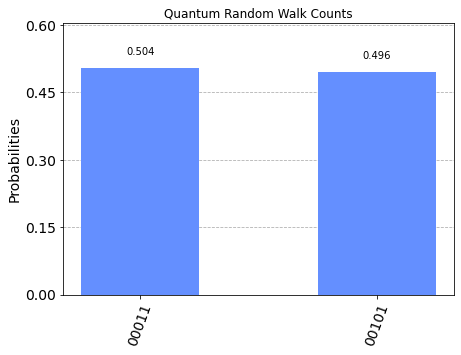

In [124]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

# Sources

Puengtambol, W., Prechaprapranwong, P., & Taetragool, U. (2021). Implementation of quantum 	
    random walk on a real quantum computer. Paper presented at the Journal of Physics: 	
    Conference Series.